

## Introduction

In this project, we will implement linear regression and get to see it work on data. 
We need to import all libraries required for this programming exercise. 

In [1]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces

# tells matplotlib to embed plots within the notebook
%matplotlib inline

Iris species of a flower is one of the most popular datasets for machine learning. This dataset is primarily for classification, but here we will use same dataset with some changes so that we can use it for Linear Regression. Let's load the dataset first.

In [2]:
import pandas as pd
from sklearn import datasets
iris = datasets.load_iris()

It includes three iris species named as 'setosa' , 'versicolor', 'virginica' with  some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

Id, 
Sepal Length Cm, 
Sepal Width Cm,,
Petal Length Cm, 
Petal Width Cm, 
Species. Let's see some of the first rows of the datasets after loading it from sklearn.

In [3]:
iris_data =pd.DataFrame(iris.data, columns=iris.feature_names)
iris_data["target"]=iris.target
iris_data.head(20)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


We shall obtain the basic details using shape, info and describe.

In [4]:
iris_data.shape

(150, 5)

In [5]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [6]:
iris_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


We can now rename column name to make it more standard for ease of coding and readability.

In [7]:
iris_data.rename(columns={'sepal length (cm)':'sepal_length',
                          'sepal width (cm)':'sepal_width',
                          'petal length (cm)':'petal_length',
                          'petal width (cm)':'petal_width'},inplace=True)
print(iris_data)

     sepal_length  sepal_width  petal_length  petal_width  target
0             5.1          3.5           1.4          0.2       0
1             4.9          3.0           1.4          0.2       0
2             4.7          3.2           1.3          0.2       0
3             4.6          3.1           1.5          0.2       0
4             5.0          3.6           1.4          0.2       0
..            ...          ...           ...          ...     ...
145           6.7          3.0           5.2          2.3       2
146           6.3          2.5           5.0          1.9       2
147           6.5          3.0           5.2          2.0       2
148           6.2          3.4           5.4          2.3       2
149           5.9          3.0           5.1          1.8       2

[150 rows x 5 columns]


We shall plot the petal_length on x-axis and petal_width on y-axis to analyse the data.

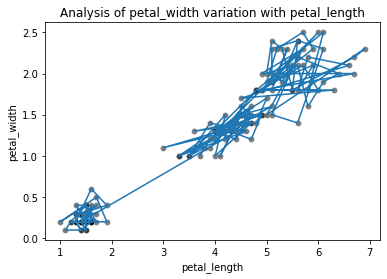

In [8]:

import seaborn as sns

sns.scatterplot(x= iris_data['petal_length'], y=iris_data['petal_width'], color="black", alpha=0.5)
plt.plot(iris_data['petal_length'], iris_data['petal_width'])
_ = plt.title("Analysis of petal_width variation with petal_length")

Add a new column named "species" having value {if target == 0 : 'setosa' ,
if target ==1 : 'versicolor',
if target == 2 : 'virginica' }

In [9]:
#your code here
species=pd.Series([])
for i in range(len(iris_data)):
    if iris_data["target"][i] == 0:
        species[i]="setosa"
 
    elif iris_data["target"][i] == 1:
        species[i]='versicolor'
 
    elif iris_data["target"][i] == 2:
        species[i]="virginica"
iris_data['species']=species

<ipython-input-9-23bafe24ce78>:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  species=pd.Series([])


we will now select "versicolor" to predict its "petal_width" using "petal_length " as one of the parameter.So your next task is to make a new DataFrame named "data" having only rows whose species values are 'versicolor'.


In [10]:
#your code here
data=iris_data[iris_data['species']=='versicolor']
data.head()

,sepal_length,sepal_width,petal_length,petal_width,target,species
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


Now we are dropping  all the columns except petal_length and petal_width 

In [11]:
data.drop(columns=['target','species','sepal_length','sepal_width'],inplace=True)
data.head()

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,petal_length,petal_width
50,4.7,1.4
51,4.5,1.5
52,4.9,1.5
53,4.0,1.3
54,4.6,1.5


Now we shall write code to print the shape of DataFrame named as data.

In [12]:
#your code here
data.shape

(50, 2)

Now we shall plot the Dataframe named data having x axis as 'petal_length', y axis as 'petal_width' and kind='scatter' 

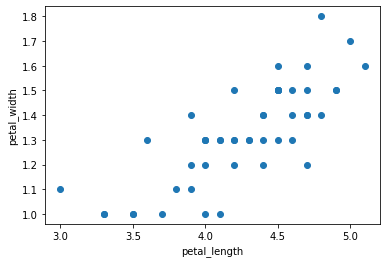

In [13]:
#your code here
x=data['petal_length']
y=data['petal_width']
plt.scatter(x,y)
plt.xlabel("petal_length")
plt.ylabel("petal_width")
plt.show()

Now let's start with Linear Regression

We will now split the dataset into training and test datasets into (X_train,Y_train) and (X_test,Y_test)

In [14]:
from sklearn.model_selection import train_test_split
X=data['petal_length'].values.reshape(-1,1)
Y=data['petal_width'].values.reshape(-1,1)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.33,random_state=1)


Now let's plot the training  datasets of  kind scatter with x axis as X_train and y axis as Y_train.

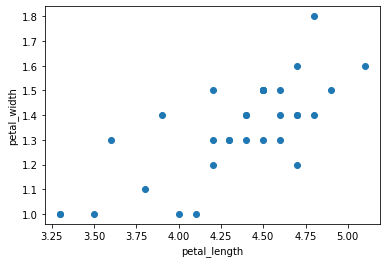

In [15]:
#your code here for plotting training dataset
plt.scatter(X_train,Y_train)
plt.xlabel("petal_length")
plt.ylabel("petal_width")
plt.show()

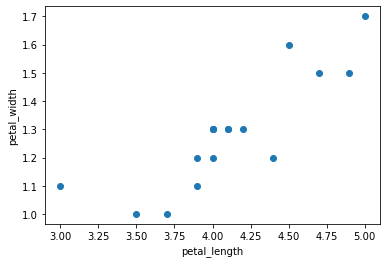

In [16]:
#your code here for plotting test dataset
plt.scatter(X_test,Y_test)
plt.xlabel("petal_length")
plt.ylabel("petal_width")
plt.show()

Now we will write the code for LinearRegession using sklearn.

In [17]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_train, Y_train)
#your code here

LinearRegression()

Now we will print the Intercept and Coefficient.

In [18]:
#your code here
intercept_regression=lin_reg.intercept_
print(intercept_regression)
print (lin_reg.coef_)

[-0.10228121]
[[0.3338594]]


Now we can overlay the predicted line and test data points to see where the predicted point lies.

In [19]:
#your code here
lin_reg.predict(X_test[0].reshape(1,-1))


array([[1.56701578]])

In [20]:
lin_reg.predict(Y_test[0].reshape(1,-1))

array([[0.46527977]])

In [21]:
#Score for training data
lin_reg.score(X_train, Y_train)

0.5597196093591721

In [22]:
#Score for testing data
lin_reg.score(X_test, Y_test)

0.7138793935182641